In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
logpath = '/Users/luis/Desktop/Cranmer2024/Workplace/smallMutations/similar-expressions/src/dev/SR_loss_logging/logs'
fpath = os.path.join(logpath, sorted([fname for fname in os.listdir(logpath) if fname.endswith('.csv')])[-1])
print(f'{fpath=}')
df = pd.read_csv(fpath)

df['loss_diff'] = df['loss_after'] - df['loss_before']
df['score_diff'] = df['score_after'] - df['score_before']

df['is_inf'] = np.isinf(df.score_after) | np.isinf(df.loss_after)

print(f'{df.shape=}')

df.head()

fpath='/Users/luis/Desktop/Cranmer2024/Workplace/smallMutations/similar-expressions/src/dev/SR_loss_logging/logs/sr_logs_2025-04-04_11-10-45.csv'
df.shape=(58503, 15)


,timestamp,mutation_type,num_evals,attempts,loss_before,loss_after,score_before,score_after,successful_mutation,mutation_accepted,result_reason,TED,loss_diff,score_diff,is_inf
0,1.743758e+09,insert_node,1,1,140759.61,1.322195e+05,0.952413,0.894629,True,True,pass,4.0,-8.540140e+03,-0.057785,False
1,1.743758e+09,insert_node,1,1,132219.47,1.501718e+05,0.894629,1.016098,True,True,pass,2.0,1.795230e+04,0.121470,False
2,1.743758e+09,mutate_operator,1,1,143641.40,1.943345e+05,0.971912,1.314914,True,True,pass,1.0,5.069315e+04,0.343002,False
3,1.743758e+09,neural_mutate_tree,1,1,140759.61,1.407596e+05,0.952413,0.952413,True,True,pass,0.0,0.000000e+00,0.000000,False
4,1.743758e+09,delete_node,1,1,132219.47,1.919105e+08,0.894629,1298.513000,True,False,annealing_or_frequency,1.0,1.917783e+08,1297.618371,False


In [3]:
# Show results reason by mutation count
# Get counts by mutation type and result reason
counts_df = df.groupby('mutation_type')['result_reason'].value_counts().unstack().fillna(0)

# Add sum of each mutation type
counts_df['sum'] = counts_df.sum(axis=1)

# Calculate ratios
ratio_df = (counts_df.div(counts_df['sum'], axis=0)*100).round(2)

# Display counts and ratios
print("Counts:")
display(counts_df)
print("\nRatios:")
display(ratio_df)

Counts:


result_reason,annealing_or_frequency,failed_constraint_check,pass,sum
mutation_type,,,,
add_node,228.0,0.0,166.0,394.0
delete_node,690.0,0.0,1839.0,2529.0
do_nothing,0.0,0.0,2790.0,2790.0
insert_node,6686.0,1.0,5768.0,12455.0
mutate_constant,39.0,0.0,94.0,133.0
mutate_operator,6324.0,0.0,17689.0,24013.0
neural_mutate_tree,658.0,1.0,5906.0,6565.0
randomize,38.0,0.0,13.0,51.0
rotate_tree,2154.0,0.0,7385.0,9539.0



Ratios:


result_reason,annealing_or_frequency,failed_constraint_check,pass,sum
mutation_type,,,,
add_node,57.87,0.00,42.13,100.0
delete_node,27.28,0.00,72.72,100.0
do_nothing,0.00,0.00,100.00,100.0
insert_node,53.68,0.01,46.31,100.0
mutate_constant,29.32,0.00,70.68,100.0
mutate_operator,26.34,0.00,73.66,100.0
neural_mutate_tree,10.02,0.02,89.96,100.0
randomize,74.51,0.00,25.49,100.0
rotate_tree,22.58,0.00,77.42,100.0


In [4]:
df[['mutation_type', 'TED']].groupby('mutation_type').TED.describe()

,count,mean,std,min,25%,50%,75%,max
mutation_type,,,,,,,,
add_node,394.0,6.210660,6.945721,1.0,1.0,2.0,9.75,33.0
delete_node,2529.0,2.410439,4.491904,0.0,0.0,0.0,3.00,33.0
do_nothing,2790.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
insert_node,12455.0,3.775592,4.313064,1.0,1.0,2.0,4.00,36.0
mutate_constant,133.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
mutate_operator,24013.0,0.750052,0.432992,0.0,1.0,1.0,1.00,1.0
neural_mutate_tree,6565.0,1.633359,2.791465,0.0,0.0,0.0,2.00,15.0
randomize,51.0,17.980392,7.958618,3.0,11.0,20.0,24.50,33.0
rotate_tree,9539.0,6.028305,6.367480,0.0,2.0,4.0,8.00,36.0


/var/folders/kn/k8zt16ss511gp4m6y14ttn840000gn/T/ipykernel_59545/240604976.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  'geo_mean': filtered_df.groupby('mutation_type').apply(
/var/folders/kn/k8zt16ss511gp4m6y14ttn840000gn/T/ipykernel_59545/240604976.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  'log_transform_mean': filtered_df.groupby('mutation_type').apply(


,median,geo_mean,log_transform_mean,trimmed_mean,winsorized_mean,percent_negative,percent_<0.1,percent_<1
mutation_type,,,,,,,,
add_node,0.267821,9.562018e-02,0.985028,4.832407,6.457040,8.743169,42.349727,77.868852
delete_node,0.062990,1.067889e-02,0.943102,0.688307,4.608517,4.689379,53.707415,80.440882
do_nothing,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000
insert_node,0.083704,6.365112e-02,1.621525,18.250239,248.852247,9.713308,51.065469,81.720154
mutate_constant,0.028355,5.922375e-03,0.418237,1.498520,0.611129,6.060606,57.575758,80.303030
mutate_operator,0.048877,5.708873e-04,0.794984,0.994323,2.980466,1.971699,54.276973,83.733481
neural_mutate_tree,0.000094,1.794504e-05,0.101432,0.045693,0.026673,9.211530,90.773219,98.337654
randomize,0.831021,1.616653e+00,1.343340,43.426044,13.296221,0.000000,0.000000,75.609756
rotate_tree,0.017555,7.051687e-04,1.353587,0.507059,410.789714,2.577816,61.578778,87.207188


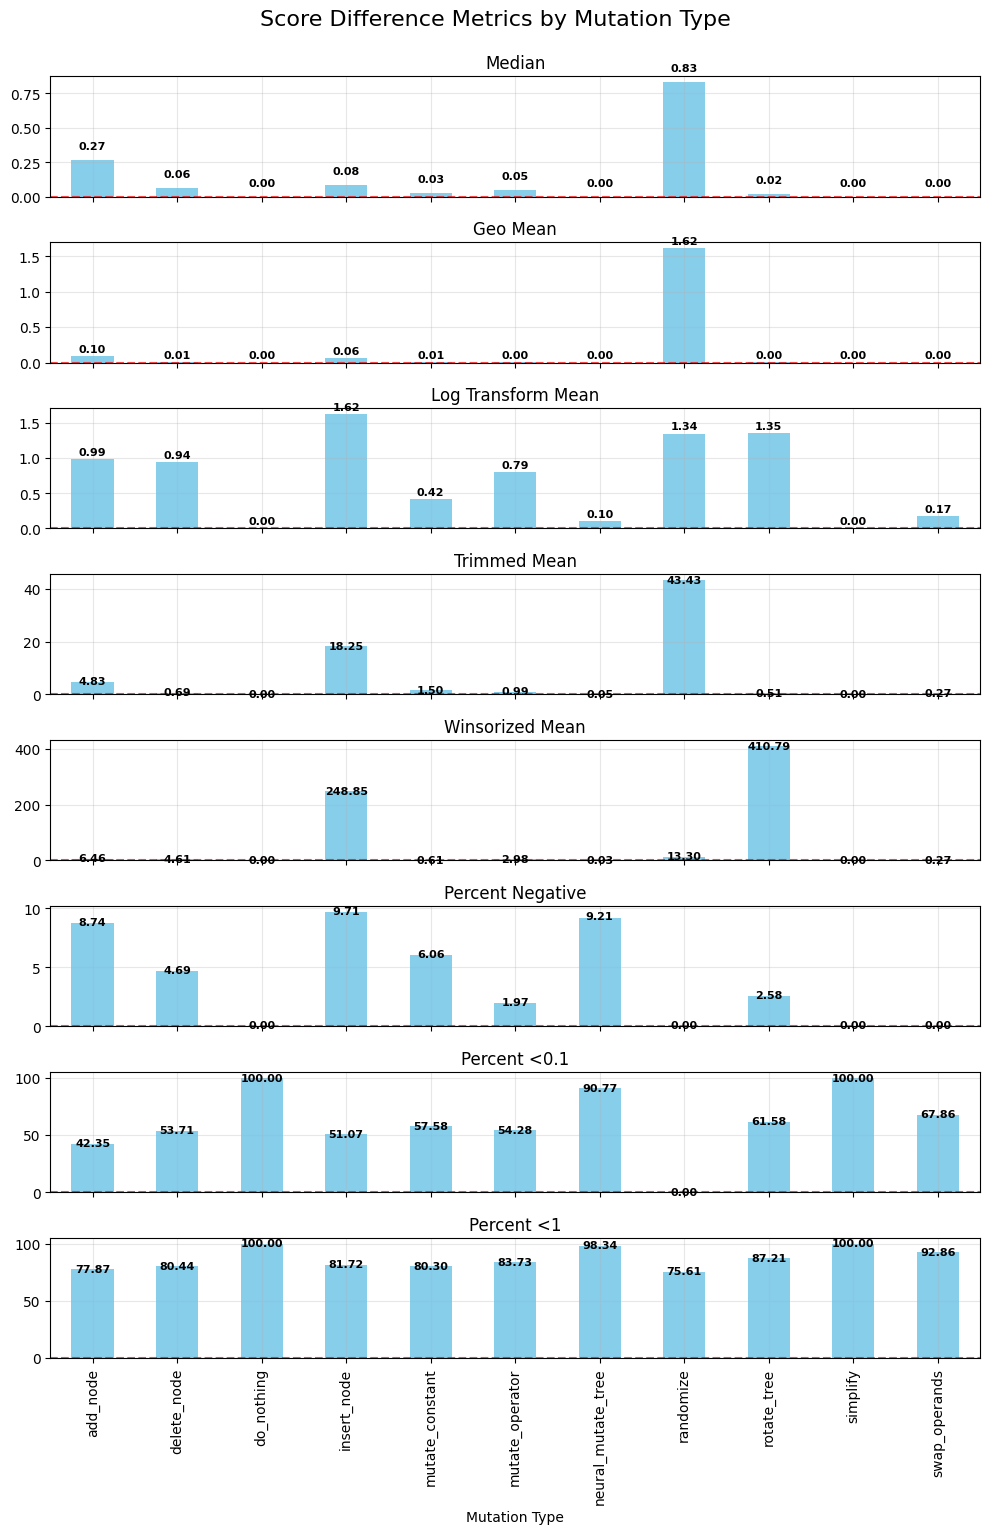

In [6]:
# Filter out infinite values
filtered_df = df[~df.is_inf]

# Group by mutation_type and calculate different metrics
result = pd.DataFrame({
    'median': filtered_df.groupby('mutation_type')['score_diff'].median(),
    'geo_mean': filtered_df.groupby('mutation_type').apply(
        lambda x: np.exp(np.mean(np.log(np.abs(x['score_diff']) + 1e-10))) * np.sign(np.mean(x['score_diff']))
    ),
    'log_transform_mean': filtered_df.groupby('mutation_type').apply(
        lambda x: np.mean(np.sign(x['score_diff']) * np.log1p(np.abs(x['score_diff'])))
    ),
    'trimmed_mean': filtered_df.groupby('mutation_type')['score_diff'].apply(
        lambda x: np.percentile(x, [10, 90]).mean()  # Alternative way to get trimmed mean
    ),
    'winsorized_mean': filtered_df.groupby('mutation_type')['score_diff'].apply(
        lambda x: np.mean(np.clip(x, np.percentile(x, 5), np.percentile(x, 95)))  # Winsorize at 5th and 95th percentiles
    ),
    'percent_negative': filtered_df.groupby('mutation_type')['score_diff'].apply(
        lambda x: (x < -1e-12).mean() * 100  # Calculate percentage of negative values
    ),
    'percent_<0.1': filtered_df.groupby('mutation_type')['score_diff'].apply(
        lambda x: (x < 0.1).mean() * 100  # Calculate percentage of negative values
    ),
    'percent_<1': filtered_df.groupby('mutation_type')['score_diff'].apply(
        lambda x: (x < 1).mean() * 100  # Calculate percentage of negative values
    )
})

# Display the result dataframe
display(result)

# Create a figure with multiple subplots for different metrics
fig, axes = plt.subplots(len(result.columns), 1, figsize=(10, 15), sharex=True)
metrics = ['median', 'geo_mean', 'log_transform_mean', 'trimmed_mean', 'winsorized_mean', 'percent_negative', 'percent_<0.1', 'percent_<1']

for i, metric in enumerate(metrics):
    result[metric].plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'{metric.replace("_", " ").title()}')
    axes[i].grid(True, alpha=0.3)
    axes[i].axhline(y=0, color='red', linestyle='--', alpha=0.7)
    
    # Add value labels on top of bars
    for j, v in enumerate(result[metric]):
        axes[i].text(j, v + (0.1 if v >= 0 else -0.1), 
                    f'{v:.2f}', ha='center', va='center' if v >= 0 else 'top',
                    fontweight='bold', fontsize=8)

plt.tight_layout()
plt.xlabel('Mutation Type')
plt.suptitle('Score Difference Metrics by Mutation Type', fontsize=16, y=1.02)
plt.show()

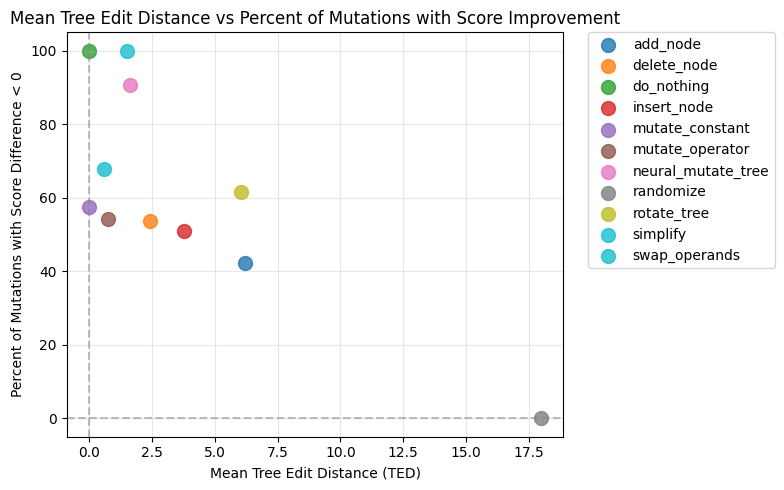

In [9]:
# Calculate mean TED for each mutation type
mean_ted = df.groupby('mutation_type')['TED'].mean()

# Calculate percent negative score_diff for each mutation type (excluding infinities)
# Negative score_diff is good (improvement)
percent_smaller_than_01 = df[~df.is_inf].groupby('mutation_type')['score_diff'].apply(
    lambda x: (x < 0.1).mean() * 100  # Calculate percentage of negative values
)

# Combine the data
plot_data = pd.DataFrame({
    'Mean TED': mean_ted,
    'Percent Negative Score': percent_smaller_than_01
}).dropna()  # Remove any rows with NaN values

# Create scatter plot with color coding
plt.figure(figsize=(8, 5))

# Create a colormap
colors = plt.cm.tab10(np.linspace(0, 1, len(plot_data)))

# Plot each point with a different color
for i, (idx, row) in enumerate(plot_data.iterrows()):
    plt.scatter(row['Mean TED'], row['Percent Negative Score'], 
                s=100, alpha=0.8, color=colors[i], label=idx)

plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)

plt.title('Mean Tree Edit Distance vs Percent of Mutations with Score Improvement')
plt.xlabel('Mean Tree Edit Distance (TED)')
plt.ylabel('Percent of Mutations with Score Difference < 0')
plt.grid(True, alpha=0.3)

# Add legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()

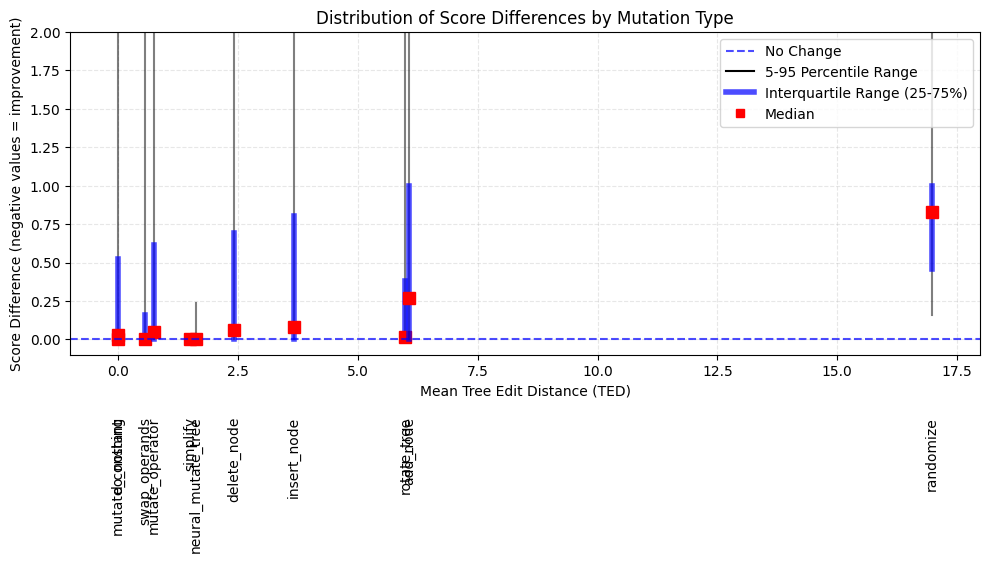

In [25]:
# Create a plot with boxplot-style visualization for each mutation type
# showing median and percentiles of score_diff

# Filter out infinities for better visualization
filtered_df = df[~df.is_inf]

# Calculate statistics for each mutation type
stats = filtered_df.groupby('mutation_type').agg({
    'score_diff': [
        ('median', 'median'),
        ('q25', lambda x: x.quantile(0.25)),
        ('q75', lambda x: x.quantile(0.75)),
        ('min', lambda x: x.quantile(0.05)),  # Using 5th percentile instead of min to avoid outliers
        ('max', lambda x: x.quantile(0.95))   # Using 95th percentile instead of max to avoid outliers
    ],
    'TED': [('mean', 'mean')]  # Add mean TED calculation
}).reset_index()

# Flatten the multi-level columns
stats.columns = ['_'.join(col).strip('_') for col in stats.columns.values]

# Sort by median for better visualization
stats = stats.sort_values('score_diff_median')

# Create the figure
plt.figure(figsize=(10, 6))

# Plot each mutation type as a vertical line with markers
for i, row in enumerate(stats.itertuples()):
    mutation = row.mutation_type
    
    # Use the mean TED as the x position instead of the index
    x_pos = row.TED_mean
    
    # Plot the min-max line (5-95 percentile range)
    plt.plot([x_pos, x_pos], [row.score_diff_min, row.score_diff_max], 'k-', alpha=0.5)
    
    # Plot the interquartile range as a thicker, colored line for better visibility
    plt.plot([x_pos, x_pos], [row.score_diff_q25, row.score_diff_q75], 'b-', linewidth=4, alpha=0.7)
    
    # Plot the median as a distinct marker
    plt.plot(x_pos, row.score_diff_median, 'rs', markersize=8)
    
    # Plot the mean as a square marker
    # plt.plot(x_pos, row.TED_mean, 'gs', markersize=8)
    
    # Add the mutation type label
    plt.text(x_pos, stats['score_diff_min'].min() - 0.5, mutation, ha='center', va='top', rotation=90)

# Add a horizontal line at y=0 to show the boundary between improvement and degradation
plt.axhline(y=0, color='blue', linestyle='--', alpha=0.7, label='No Change')

# Set the x-axis limits to give some padding
plt.xlim(stats['TED_mean'].min() - 1, stats['TED_mean'].max() + 1)

# Add labels and title
plt.xlabel('Mean Tree Edit Distance (TED)')
plt.ylabel('Score Difference (negative values = improvement)')
plt.title('Distribution of Score Differences by Mutation Type')

# Add a legend to explain the plot elements
plt.plot([], [], 'k-', label='5-95 Percentile Range')
plt.plot([], [], 'b-', linewidth=4, alpha=0.7, label='Interquartile Range (25-75%)')
plt.plot([], [], 'rs', label='Median')
# plt.plot([], [], 'gs', label='Mean TED')
plt.legend(loc='best')

# Add grid lines for better readability
plt.grid(linestyle='--', alpha=0.3)

plt.ylim(-0.1, 2)

plt.tight_layout()
plt.show()


In [120]:
(df[df.is_inf].groupby('mutation_type').size() / df.groupby('mutation_type').size()*100).round(2)

mutation_type
add_node               5.59
delete_node            1.20
do_nothing              NaN
insert_node            4.18
mutate_constant         NaN
mutate_operator        2.83
neural_mutate_tree     0.18
randomize             15.87
rotate_tree            1.94
simplify                NaN
swap_operands           NaN
dtype: float64

In [116]:
df[~df.is_inf].groupby('mutation_type').loss_diff.median()

mutation_type
add_node               5588.27000
delete_node            4781.05350
do_nothing                0.00000
insert_node            2022.57000
mutate_constant         286.75000
mutate_operator        3962.76900
neural_mutate_tree        0.00000
randomize             65646.51250
rotate_tree             224.71562
simplify                  0.00000
swap_operands             0.00000
Name: loss_diff, dtype: float64

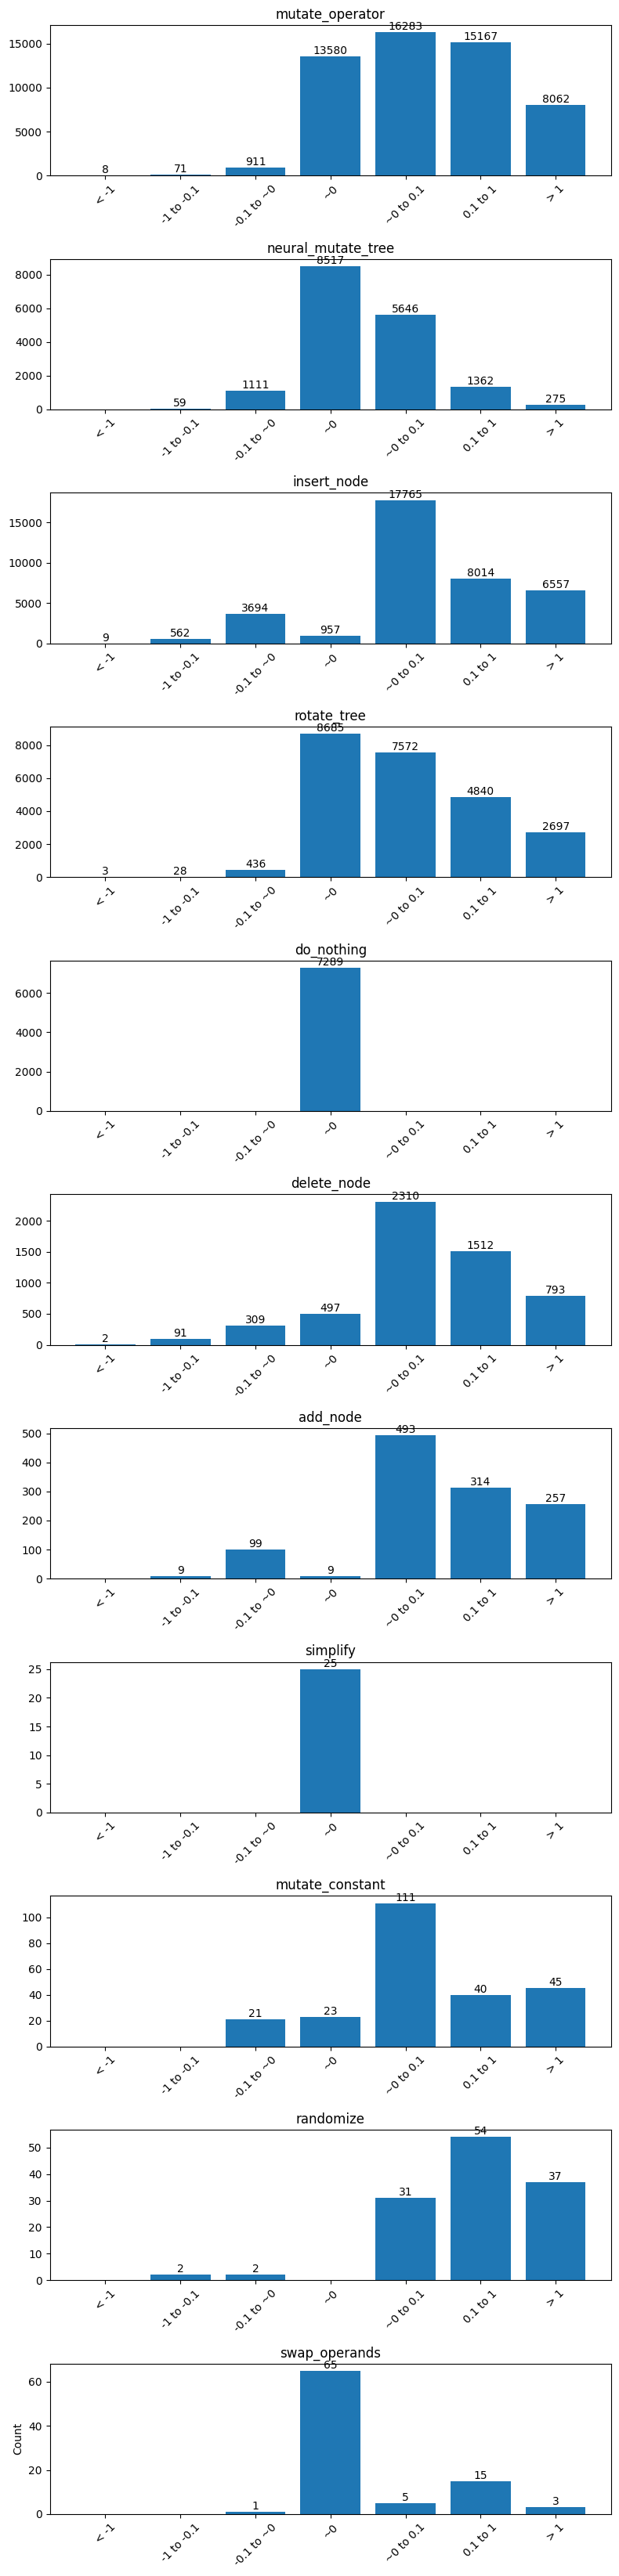

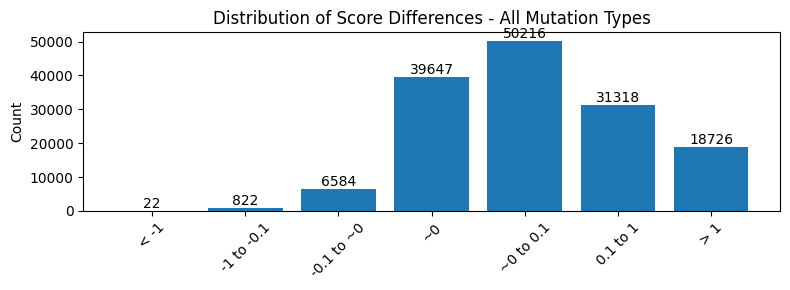

In [117]:
# Create histogram with custom bin boundaries for score differences
col = 'score_diff'

# Define custom bin boundaries with specific thresholds
bins = [-np.inf, -1, -0.1, -1e-12, 1e-12, 0.1, 1, np.inf]
bin_labels = ['< -1', '-1 to -0.1', '-0.1 to ~0', '~0', '~0 to 0.1', '0.1 to 1', '> 1']

# Create a figure with subplots for each mutation type
mutation_types = df['mutation_type'].unique()
n_mutations = len(mutation_types)
fig, axes = plt.subplots(nrows=n_mutations, figsize=(8, 3*n_mutations))

# For each mutation type, create a histogram
for i, mutation_type in enumerate(mutation_types):
    # Filter data for this mutation type
    mutation_df = df[df['mutation_type'] == mutation_type]
    
    # Count values in each bin
    hist, _ = np.histogram(mutation_df[col], bins=bins)
    
    # Plot the histogram
    ax = axes[i]
    ax.bar(range(len(hist)), hist, tick_label=bin_labels)
    plt.ylabel('Count')
    ax.set_title(f'{mutation_type}')
    ax.tick_params(axis='x', rotation=45)
    
    # Add bin counts as text on the plot
    for j, count in enumerate(hist):
        if count > 0:  # Only show non-zero counts
            ax.text(j, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Also create an overall histogram for all mutation types combined
plt.figure(figsize=(8, 3))
hist, _ = np.histogram(df[col], bins=bins)
plt.bar(range(len(hist)), hist, tick_label=bin_labels)
plt.ylabel('Count')
plt.title('Distribution of Score Differences - All Mutation Types')
plt.xticks(rotation=45)

# Add bin counts as text
for j, count in enumerate(hist):
    if count > 0:
        plt.text(j, count, str(count), ha='center', va='bottom')
        
plt.tight_layout()
plt.show()

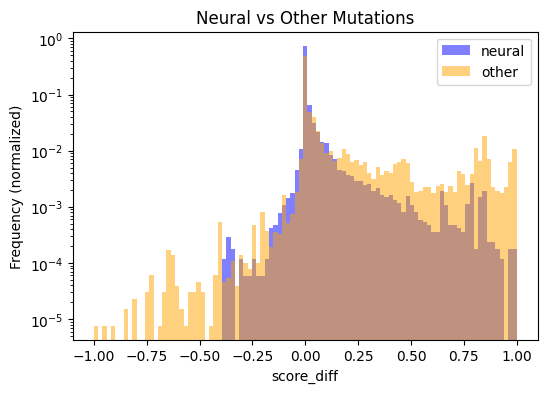

In [119]:
a, n = 1, 100
col = 'score_diff'

# Compare neural_mutate_tree with other mutation types
neural_df = df[df.mutation_type == 'neural_mutate_tree']
other_df = df[df.mutation_type != 'neural_mutate_tree']

# Get counts for normalization
neural_count = len(neural_df)
other_count = len(other_df)

# Plot score differences normalized by count
plt.figure(figsize=(6, 4))
bins = np.linspace(-a, a, n)
plt.hist(neural_df[col], bins=bins, alpha=0.5, label='neural', color='blue', 
         weights=np.ones(neural_count)/neural_count)
plt.hist(other_df[col], bins=bins, alpha=0.5, label='other', color='orange', 
         weights=np.ones(other_count)/other_count)
plt.yscale('log')
plt.legend()
plt.xlabel(col)
plt.ylabel('Frequency (normalized)')
plt.title('Neural vs Other Mutations')
plt.show()

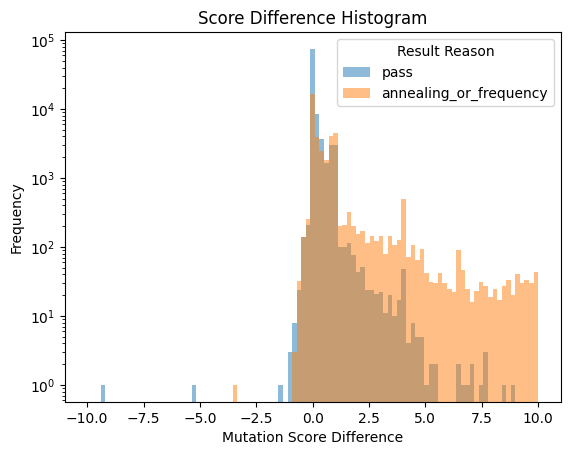

In [20]:
col = 'score_diff'
a, n = 10, 100
bins = np.linspace(-a, a, n)

plt.hist(df[df.result_reason == 'pass'][col], bins=bins, alpha=0.5, label='pass')
plt.hist(df[df.result_reason == 'annealing_or_frequency'][col], bins=bins, alpha=0.5, label='annealing_or_frequency')
plt.legend(title='Result Reason')
plt.yscale('log')
plt.xlabel('Mutation Score Difference')
plt.ylabel('Frequency')
plt.title('Score Difference Histogram')
plt.show()

pass

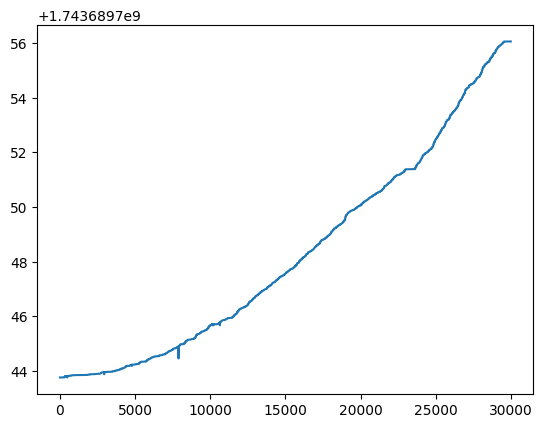

In [109]:
plt.plot(df.timestamp)

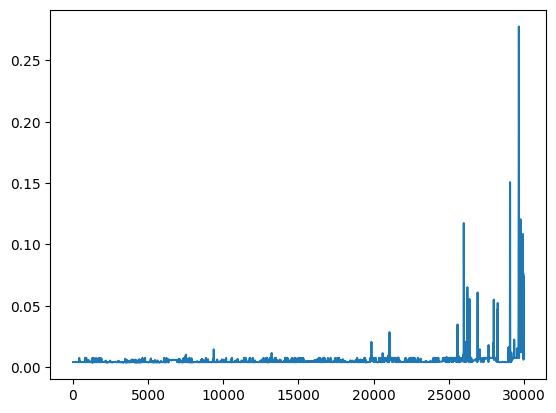

In [112]:
plt.plot(df[['timestamp', 'loss_before']].sort_values(by='timestamp', ascending=False).reset_index(drop=True)['loss_before'].rolling(window=10).mean())  # .sort_values(ascending=False).reset_index(drop=True)
# plt.ylim(0, 2)
# plt.yscale('log')

## Structural difference quantification